Dataset from https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation

<b>Abstract:</b> The Skin Segmentation dataset is constructed over B, G, R color space. Skin and Nonskin dataset is generated using skin textures from face images of diversity of age, gender, and race people.

<b>Data Set Information:</b>
The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database. Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples. 

<b>Attribute Information:</b>
This dataset is of the dimension 245057 * 4 where first three columns are B,G,R (x1,x2, and x3 features) values and fourth column is of the class labels (decision variable y).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
skin = pd.read_csv('Skin_NonSkin.txt', sep = '\t', header=None)
skin.columns = ['B', 'G', 'R', 'label']
skin.head()

,B,G,R,label
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [3]:
skin.tail()

,B,G,R,label
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2
245056,255,255,255,2


In [4]:
# Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples.
skin.label.value_counts()

2    194198
1     50859
Name: label, dtype: int64

In label column, '1' means skin, '2' means non-skin. 

In [5]:
skin.isnull().any().sum()

0

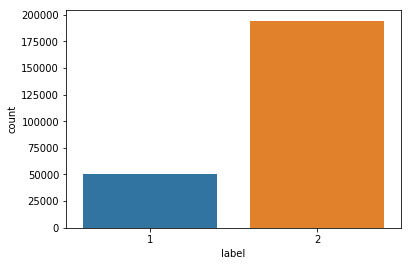

In [6]:
sns.countplot(data=skin, x='label')
# skewed dataset

In [7]:
skin['B'].value_counts(ascending=False)

178    4643
179    3987
180    3668
199    3596
172    3422
181    3253
0      3237
182    3141
164    2961
173    2764
201    2762
177    2705
53     2695
171    2552
165    2550
55     2524
54     2432
198    2377
163    2339
175    2315
167    2170
157    2127
183    2102
174    2046
176    2021
197    1947
170    1918
200    1813
52     1713
255    1681
       ... 
239     165
229     162
228     158
225     155
246     153
236     151
245     143
207     137
244     133
243     133
208     124
252     120
250     117
222     115
209     105
251     103
254     103
249      96
210      93
211      90
221      89
217      86
213      82
219      78
216      77
220      77
212      73
214      73
215      60
218      58
Name: B, Length: 256, dtype: int64

In [8]:
skin['B'].nunique()
# 0-255 for rgb values

256

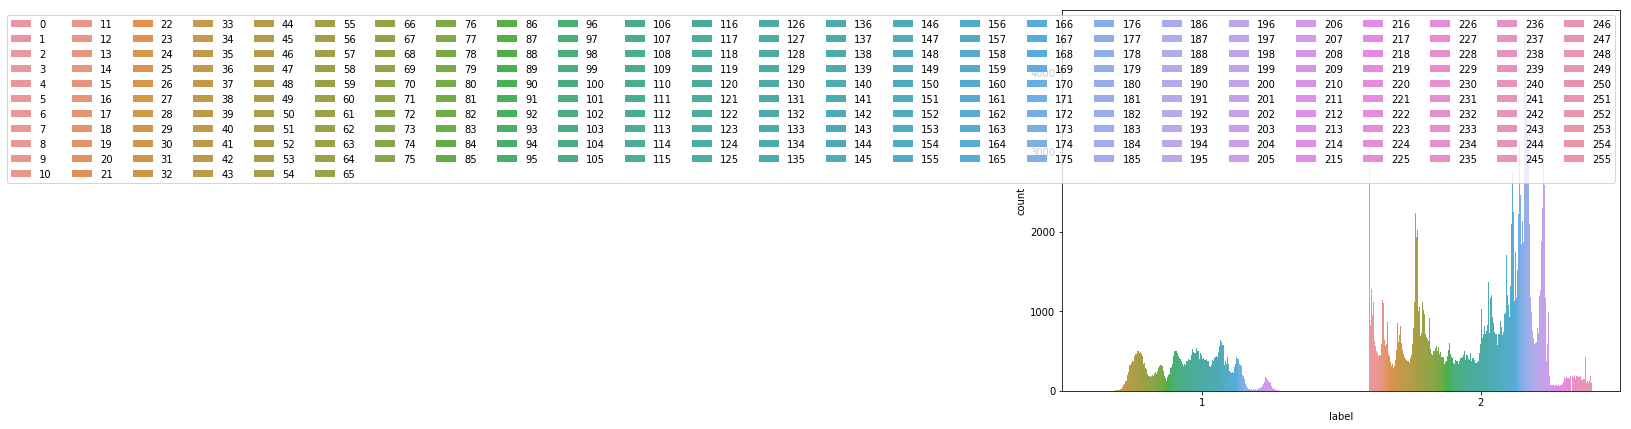

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(data=skin, x='label', hue='B')
plt.legend(loc=1, ncol=25)

In [10]:
X = skin[['B', 'G', 'R']]
y = skin[['label']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
print(logmodel.coef_)
print(logmodel.intercept_)
print(logmodel.classes_)

predictions = logmodel.predict(X_test)
predictions

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 0.02848514 -0.01135938 -0.03369528]]
[4.55637635]
[1 2]


array([2, 2, 2, ..., 2, 2, 2])

In [12]:
y_test.values

array([[2],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]])

In [13]:
from sklearn.metrics import accuracy_score
# calculate accuracy
acc = accuracy_score(y_test, predictions)
print("accuracy score =", acc*100,"%", '\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

accuracy score = 91.96387279305748 % 

              precision    recall  f1-score   support

           1       0.79      0.83      0.81     15177
           2       0.95      0.94      0.95     58341

   micro avg       0.92      0.92      0.92     73518
   macro avg       0.87      0.89      0.88     73518
weighted avg       0.92      0.92      0.92     73518



In [14]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print([tp, fp])
print([fn, tn])

[55073, 2640]
[3268, 12537]


[[12537  2640]
 [ 3268 55073]]


Text(0, 0.5, 'True')

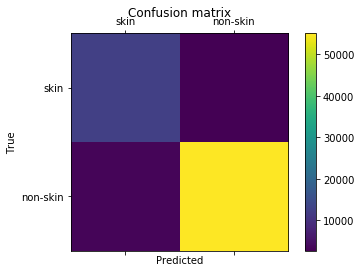

In [15]:
labels = ['skin', 'non-skin']
cm = confusion_matrix(y_test, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [16]:
df = skin.drop(columns='label')
df.head()

,B,G,R
0,74,85,123
1,73,84,122
2,72,83,121
3,70,81,119
4,70,81,119


In [17]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
normalized = scaler.fit_transform(df)
normalized[:5, :]

array([[0.44358323, 0.50952127, 0.73730726],
       [0.44206716, 0.50868002, 0.73879717],
       [0.44051737, 0.50781863, 0.74031391],
       [0.43731213, 0.50603261, 0.74343063],
       [0.43731213, 0.50603261, 0.74343063]])

In [18]:
normalized_df = pd.DataFrame(normalized, columns = df.columns)
normalized_df.head()

,B,G,R
0,0.443583,0.509521,0.737307
1,0.442067,0.508680,0.738797
2,0.440517,0.507819,0.740314
3,0.437312,0.506033,0.743431
4,0.437312,0.506033,0.743431


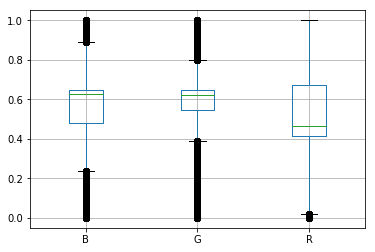

In [19]:
# Normalizer()
normalized_df.boxplot()

In [20]:
X = normalized_df.values
y = skin['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

print(logmodel.coef_)
print(logmodel.intercept_)
print(logmodel.classes_)

predictions = logmodel.predict(X_test)
predictions

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[-23.80373797 -35.93239521 -57.46189613]]
[69.39394712]
[1 2]


array([2, 2, 2, ..., 2, 2, 2])

In [21]:
# calculate accuracy
acc = accuracy_score(y_test, predictions)
print("accuracy score =", acc*100,"%", '\n')

print(classification_report(y_test, predictions))

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tn, fp, fn, tp)
print([tp,fp])
print([fn,tn])

accuracy score = 97.75565167714029 % 

              precision    recall  f1-score   support

           1       0.90      1.00      0.95     15177
           2       1.00      0.97      0.99     58341

   micro avg       0.98      0.98      0.98     73518
   macro avg       0.95      0.99      0.97     73518
weighted avg       0.98      0.98      0.98     73518

15157 20 1630 56711
[56711, 20]
[1630, 15157]


With normalization of the data, the accuracy rate raises. 

[[15157    20]
 [ 1630 56711]]


Text(0, 0.5, 'True')

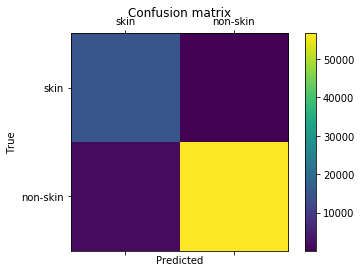

In [22]:
labels = ['skin', 'non-skin']
cm = confusion_matrix(y_test, predictions)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [23]:
logmodel.predict([[0,0,0]])   # correct prediction

array([2])

In [24]:
logmodel.predict([[255,255,255]])   # wrong prediction

array([1])

In [25]:
skin[(skin.B == 0) & (skin.G == 0) & (skin.R == 0)].head()

,B,G,R,label
91277,0,0,0,2
91283,0,0,0,2
91835,0,0,0,2
91836,0,0,0,2
92396,0,0,0,2


In [26]:
skin[(skin.B == 255) & (skin.G == 255) & (skin.R == 255)].head()

,B,G,R,label
51417,255,255,255,2
51976,255,255,255,2
52535,255,255,255,2
53094,255,255,255,2
53653,255,255,255,2


In [27]:
pred = [[255,255,255]]
pred_norm = Normalizer().fit_transform(pred)
logmodel.predict(pred_norm)

array([2])

After normalization, the predict became correct. (as f1-score raised)